Acceso al directorio local

In [1]:
%cd "C:\\Users\\jorge\\Documents\\Videogames_img\\TC3002B"
#!ls

C:\Users\jorge\Documents\Videogames_img\TC3002B


C:\Users\jorge\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Importar librerias y definir directorios de carpetas de Train y Test

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'Dataset'
train_dir = os.path.join(base_dir,'Train')
test_dir = os.path.join(base_dir, 'Test')
batch_size = 32

Generar dataset de Train

Found 8000 images belonging to 10 classes.
{'Among Us': 0, 'Apex Legends': 1, 'Fortnite': 2, 'Forza Horizon': 3, 'Free Fire': 4, 'Genshin Impact': 5, 'God of War': 6, 'Minecraft': 7, 'Roblox': 8, 'Terraria': 9}


<Figure size 640x480 with 0 Axes>

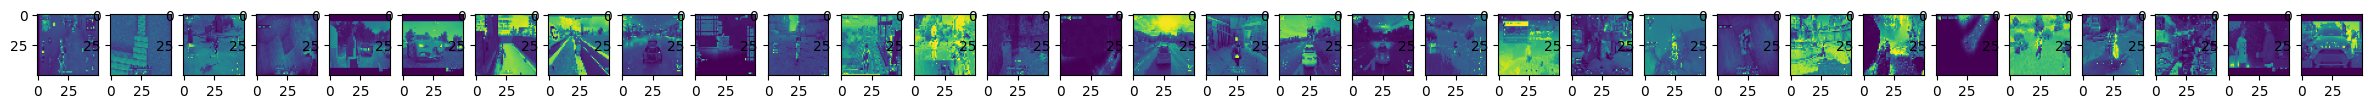

In [3]:
train_ds = ImageDataGenerator(
    rescale = 1./255,
    #zoom_range = 0.3,
    #shear_range = 0.3
    )


train_generator = train_ds.flow_from_directory(
    train_dir,
    target_size = (50,50),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

class_names = train_generator.class_indices
print(class_names)

images , labels = train_generator[0]
plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

Generar dataset para validation

Generar y preparar dataset de Test

In [34]:
test_ds = ImageDataGenerator(
    rescale = 1./255,
    #zoom_range = 0.3,
    #shear_range = 0.3
    )


test_generator = test_ds.flow_from_directory(
    test_dir,
    target_size = (50,50),
    batch_size = 2000,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)


Found 2000 images belonging to 10 classes.


# Modelo Base

In [4]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

In [6]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape = (50,50,1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2), padding = 'same'))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(64,activation='sigmoid'))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(10,activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer='adam',
						metrics=['acc'])

history = model.fit(
						train_generator,
						epochs = 5)

acc = history.history['acc']
loss = history.history['loss']

c:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 8)      │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       991,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,011,218 (3.86 MB)

 Trainable params: 1,011,218 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


c:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 450s 2s/step - acc: 0.4209 - loss: 1.7233
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - acc: 0.9237 - loss: 0.3390
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 538s 2s/step - acc: 0.9588 - loss: 0.1743
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 428s 2s/step - acc: 0.9774 - loss: 0.1015
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - acc: 0.9879 - loss: 0.0617


In [8]:
#model.save('videogame_img_v1.h5')

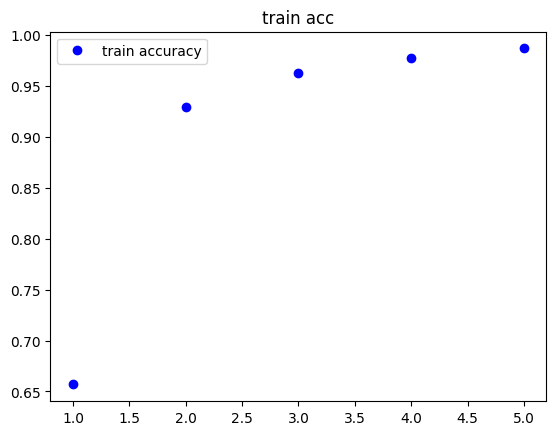

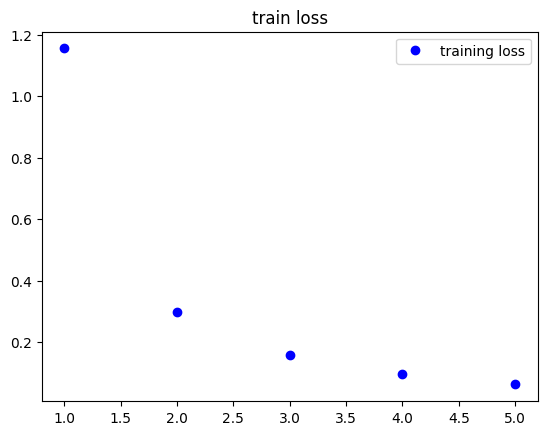

In [7]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

Evaluate Model

In [35]:

savedModel = load_model('videogame_img_v1.h5')

test_loss_original, test_acc_original = savedModel.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc_original)

c:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - acc: 0.9750 - loss: 0.0945 

test acc :
 0.9750000238418579


c:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


In [6]:
savedModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 8)      │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       991,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,011,220 (3.86 MB)

 Trainable params: 1,011,218 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [36]:
test_imgs = test_generator[0][0]
test_labels = test_generator[0][1]

predictions = savedModel.predict(test_imgs)
classes_x = np.argmax(predictions,axis=1)
classes_x
test_labels_y = np.argmax(test_labels,axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


Model          test loss              test accuracy 
Original       0.09448109567165375     0.9750000238418579


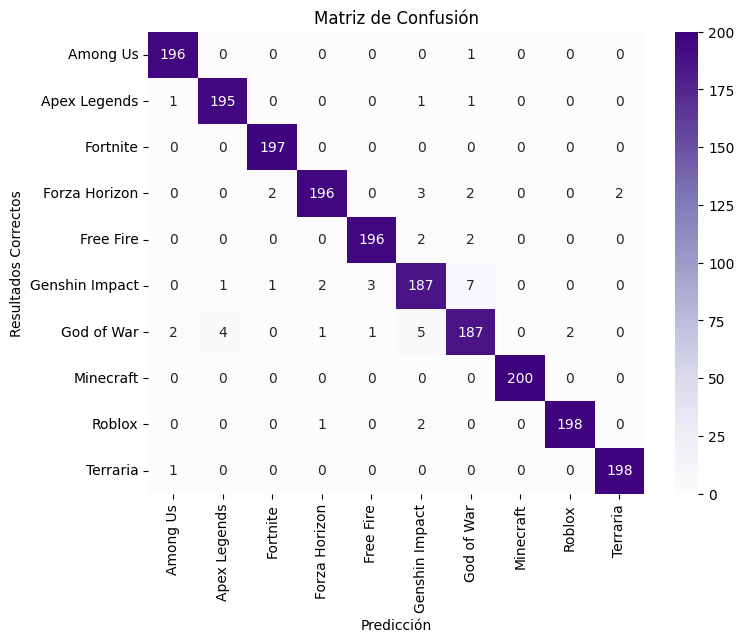

In [37]:
print('Model         ', 'test loss            ', ' test accuracy ') 
print('Original      ', test_loss_original, '   ', test_acc_original)

from tensorflow.math import confusion_matrix
import seaborn as sns

class_names = ['Among Us', 'Apex Legends', 'Fortnite', 'Forza Horizon', 'Free Fire',
               'Genshin Impact', 'God of War', 'Minecraft', 'Roblox', 'Terraria']

mat = confusion_matrix(classes_x, test_labels_y)

plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Purples", xticklabels=['Among Us', 'Apex Legends', 'Fortnite', 'Forza Horizon', 'Free Fire',
               'Genshin Impact', 'God of War', 'Minecraft', 'Roblox', 'Terraria'], yticklabels=['Among Us', 'Apex Legends', 'Fortnite', 'Forza Horizon', 'Free Fire',
               'Genshin Impact', 'God of War', 'Minecraft', 'Roblox', 'Terraria'])
plt.xlabel('Predicción')
plt.ylabel('Resultados Correctos')
plt.title('Matriz de Confusión')
plt.show()

In [38]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

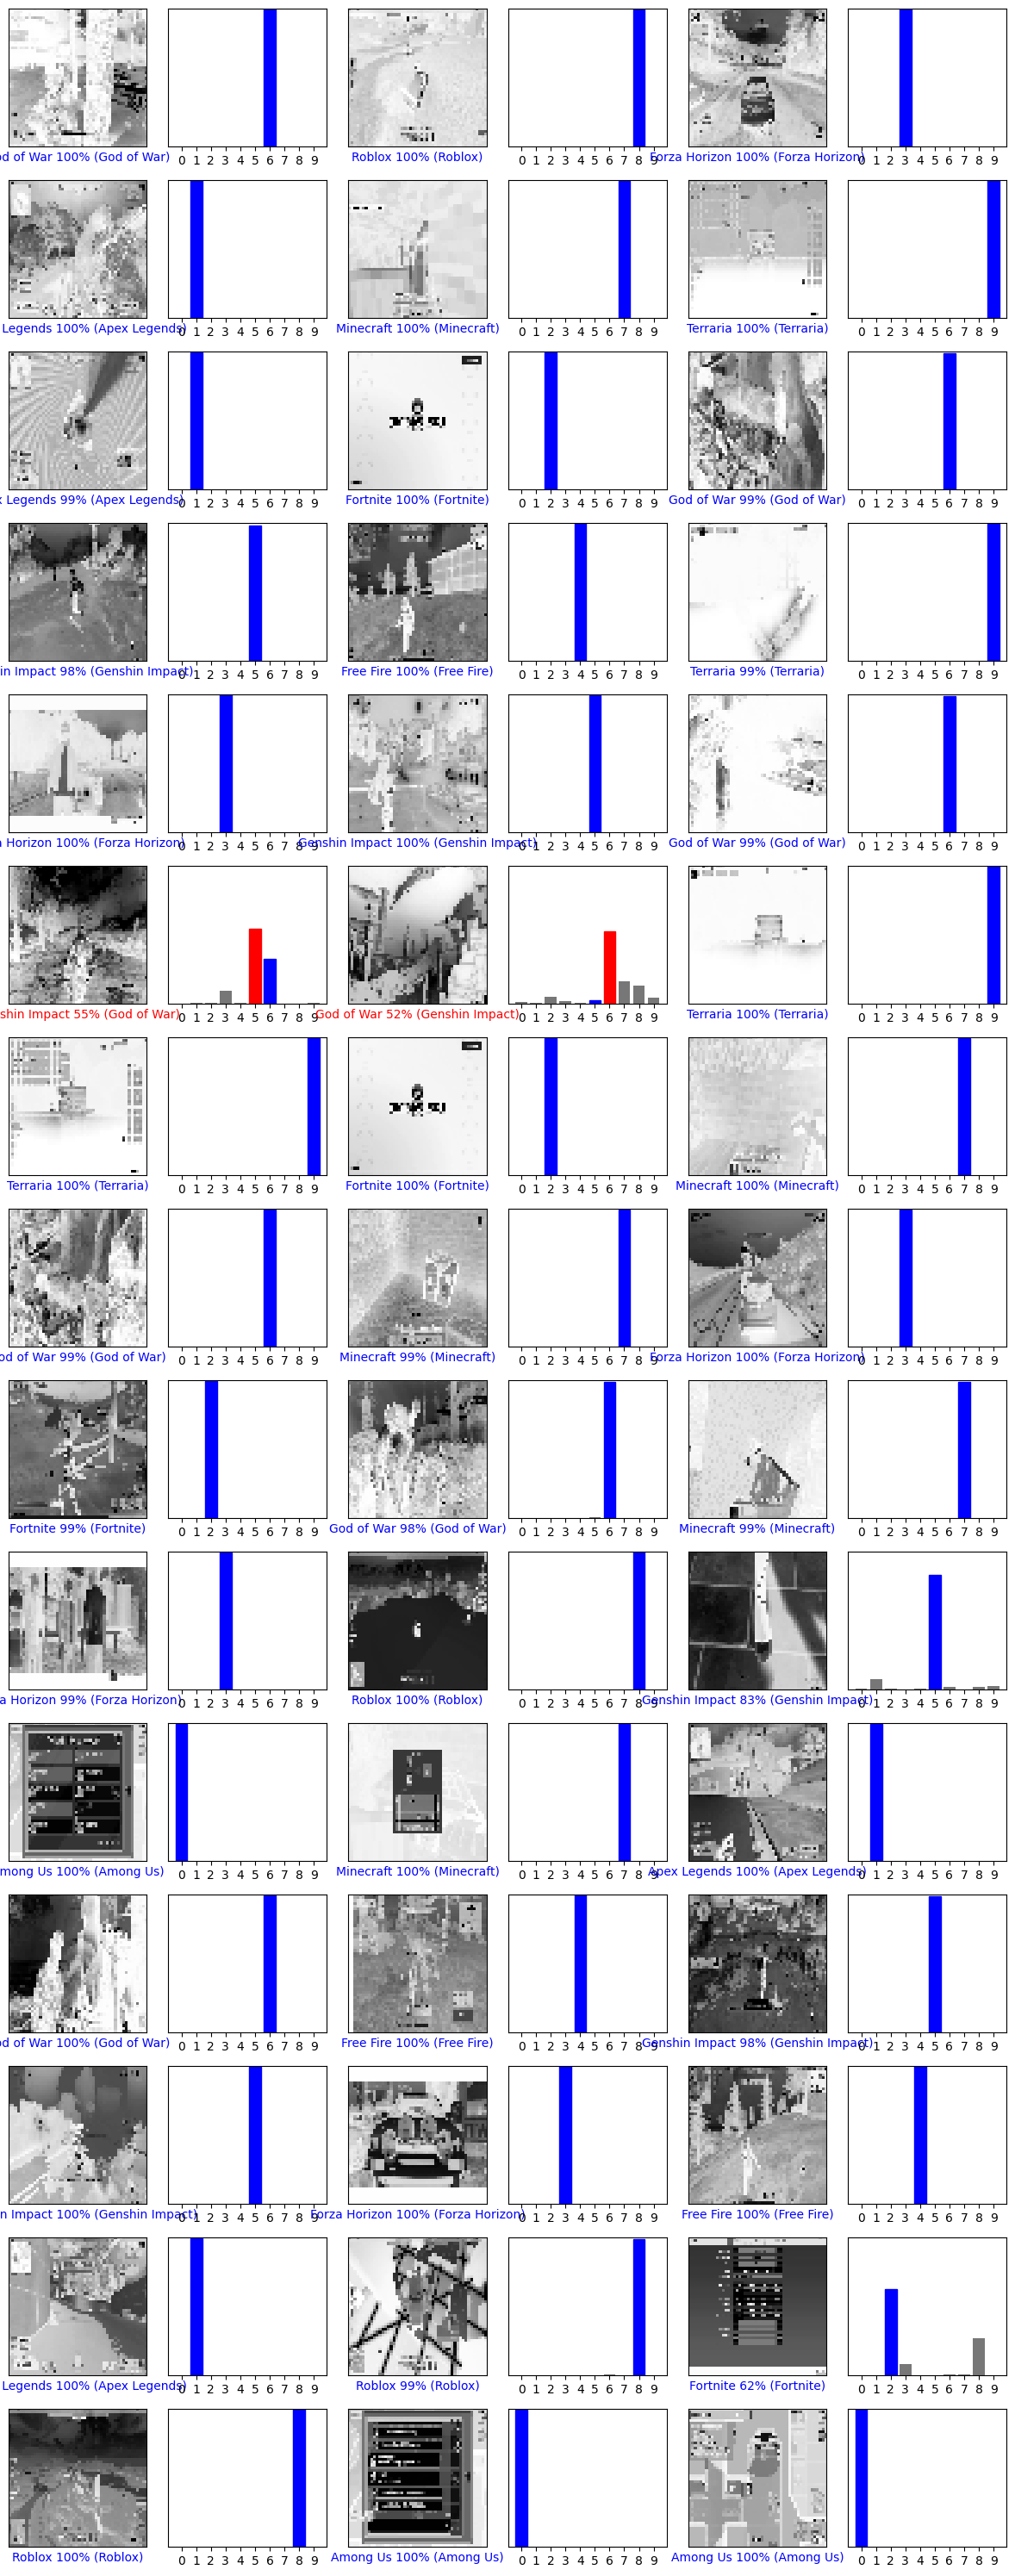

In [39]:
num_rows = 15
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels_y, test_imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels_y)
plt.tight_layout()
plt.show()